In [ ]:
import matplotlib.pyplot as plt
from matplotlib import rc
import scipy as scipy
##
import numpy as np
import matplotlib.cm as cm
import matplotlib.colors as mcolors
import networkx as nx
##
rc('font',**{'family':'serif','serif':['Times New Roman']})
rc('text', usetex=True)
%matplotlib inline

In [ ]:
def ER_adj_matrix(Nv,p):
    MatA=np.zeros([Nv,Nv])
    for i in range(Nv):
        for j in range(i,Nv):
            if i!=j:
                val=np.random.choice([0,1],p=[1-p,p])
                MatA[i][j]=val
                MatA[j][i]=val
    return np.array(MatA)


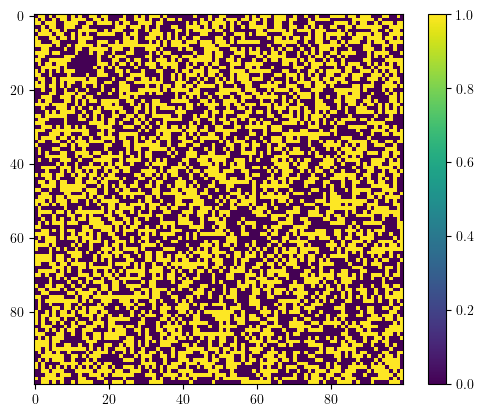

In [ ]:
plt.imshow(ER_adj_matrix(100,0.5))
plt.colorbar()
plt.show()

In [ ]:
matA=ER_adj_matrix(100,0.5)
G=nx.from_numpy_array(matA)

In [ ]:
nx.is_connected(G)

True

In [ ]:
Realizations=10
Plist=10**np.linspace(-3,0,100)
Fraction_Connected=[]
for p in Plist:
    count=0.0
    for rr in range(Realizations):
        matA=ER_adj_matrix(100,p)
        G=nx.from_numpy_array(matA)
        question=nx.is_connected(G)
        if question==True:
            count+=1.0
    Fraction_Connected.append(count/Realizations)

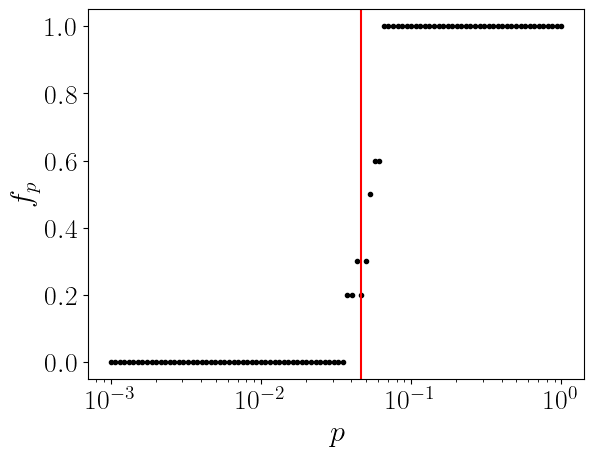

In [ ]:
plt.semilogx(Plist,Fraction_Connected,'k.')
plt.axvline(x=np.log(100)/100,color='r')
plt.ylabel(r'$f_p$',size=22)
plt.xlabel(r'$p$',size=22)
plt.yticks(size=20)
plt.xticks(size=20)
plt.show()

In [ ]:
Realizations=1000
Plist=10**np.linspace(-3,0,200)
Fraction_Connected=[]
for p in Plist:
    count=0.0
    for rr in range(Realizations):
        G=nx.erdos_renyi_graph(100,p)
        question=nx.is_connected(G)
        if question==True:
            count+=1.0
    Fraction_Connected.append(count/Realizations)

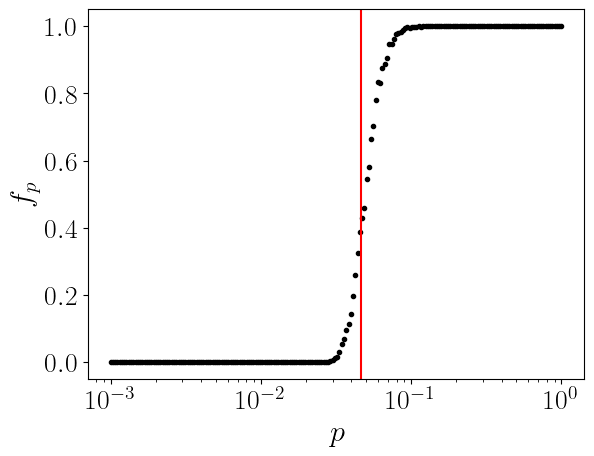

In [ ]:
plt.semilogx(Plist,Fraction_Connected,'k.')
plt.axvline(x=np.log(100)/100,color='r')
plt.ylabel(r'$f_p$',size=22)
plt.xlabel(r'$p$',size=22)
plt.yticks(size=20)
plt.xticks(size=20)
plt.show()

In [ ]:
G=nx.erdos_renyi_graph(1000,1.1*np.log(1000)/1000)

In [ ]:
Degrees=np.array(G.degree).T[1]

In [ ]:
val, freq=np.unique(Degrees,return_counts=True)

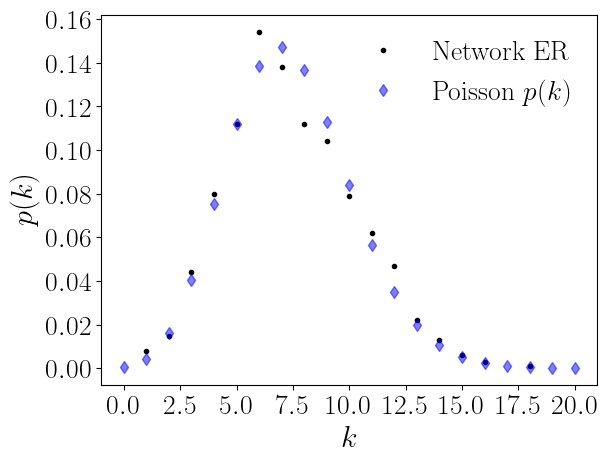

In [ ]:
plt.plot(val,freq/sum(freq),'k.',label='Network ER')
X=np.linspace(0,20,21)
Y=np.mean(Degrees)**X/scipy.special.factorial(X)
Y=Y/sum(Y)
plt.plot(X,Y,'bd',alpha=0.5,label='Poisson $p(k)$')
plt.legend(shadow=False,ncol=1,prop={'size':20},loc='upper right',frameon=False)
plt.ylabel(r'$p(k)$',size=22)
plt.xlabel(r'$k$',size=22)
plt.yticks(size=20)
plt.xticks(size=20)
plt.show()

In [ ]:
p=0.01
G=nx.erdos_renyi_graph(100,p)

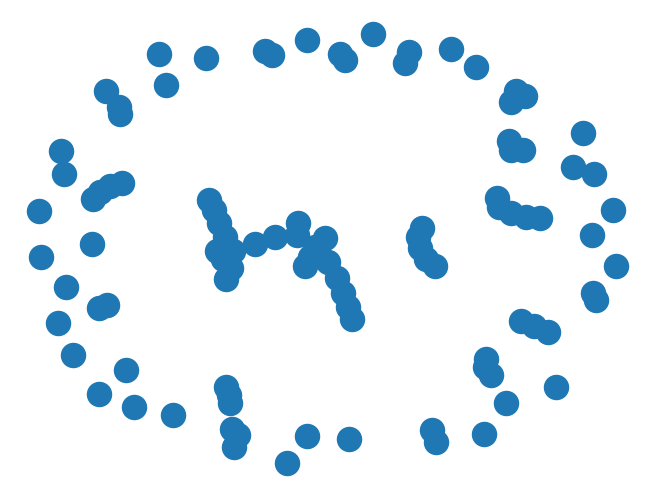

In [ ]:
nx.draw(G)